In [1]:
import math, random, scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.api as sms

To analyze the accuracy of Monte Carlo simulations in predicting areas and volumes of calculable figures, it was useful to create a Monte Carlo class. This enables efficient access to the various methods needed to run our computations and display the results.

In [42]:
class Monte_Carlo():
    
    def __init__(self, points, trials):
        self.points=points
        self.trials=trials
        self.hits=0
        self.pairs=[]
        self.three_dim_coords=[]
        self.two_dim_data=[]
        self.three_dim_data=[]
        
    # Establish random points, count ratio of points in circle of radius one, calculate error    
    def monte_carlo_pi(self):
        self.hits=0
        self.pairs=[]
        for i in range(self.points):
            x=random.uniform(-1,1)
            y=random.uniform(-1,1)
            self.pairs.append([x,y])   
        for coords in self.pairs:
            if coords[0]**2 + coords[1]**2 <=1:
                self.hits+=1      
        return math.pi - ((self.hits/self.points)*4)

    # Display the error distribution, display the random points and a circle of radius one
    def monte_carlo_display(self):
        self.monte_carlo_trials()
        plt.scatter(*zip(*self.pairs))
        draw_circle = plt.Circle((0, 0), 1,fill=False)
        plt.gcf().gca().add_artist(draw_circle)
        plt.title('View of One Trial')
        plt.show()
        two_dim_data=np.array(self.two_dim_data)
        plt.hist(two_dim_data, bins= 'auto')
        plt.title('Error Distribution for Predicted Area of a Circle with Radius One.')
        plt.xlabel('Error')
        plt.ylabel('Trials')
        plt.show()

    # Find the 95 percent confidence levels
    def confidence_interval(self):
        self.monte_carlo_trials()
        a = 1.0 * np.array(self.two_dim_data)
        b = 1.0 * np.array(self.three_dim_data)
        return sms.DescrStatsW(a).tconfint_mean(), sms.DescrStatsW(b).tconfint_mean()
    
    # Run the indicated number of trials in two and three dimensions
    def monte_carlo_trials(self):
        for i in range(self.trials):
            self.two_dim_data.append(self.monte_carlo_pi())
        for i in range(self.trials):
            self.three_dim_data.append(self.monte_carlo_pi())
        return self.two_dim_data, self.three_dim_data
    
    # Establish another axis to estimate the volume of a sphere
    def three_dimensional_ball(self):
        self.hits=0
        for i in range(self.points):
            x=random.uniform(-1,1)
            y=random.uniform(-1,1)
            z=random.uniform(-1,1)
            self.three_dim_coords.append((x,y,z))   
        for coords in self.three_dim_coords:
            if coords[0]**2 + coords[1]**2 + coords[2]**2 <= 1:
                self.hits+=1      
        return (4/3)*math.pi - ((self.hits/self.points)*8)
    
    # Display error distribution for estimating volume of sphere, display visual of one trial
    def three_dim_display(self):
        self.monte_carlo_trials()
        three_dim_data=np.array(self.three_dim_data)
        ax = plt.axes(projection='3d')
        x_coords=[]
        y_coords=[]
        z_coords=[]
        for i in range(self.points):
            x_coords.append(random.uniform(-1,1))
            y_coords.append(random.uniform(-1,1))
            z_coords.append(random.uniform(-1,1))
        plt.rcParams["figure.figsize"] = [8,8]
        ax.scatter3D(np.array(x_coords),np.array(y_coords),np.array(z_coords))
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color='r')
        plt.title('View of One Trial')
        plt.show()
        plt.hist(three_dim_data, bins= 'auto')
        plt.title('Error Distribution for Predicted Volumes of a Sphere with Radius One')
        plt.xlabel('Error')
        plt.ylabel('Trials')
        plt.show()
        
        

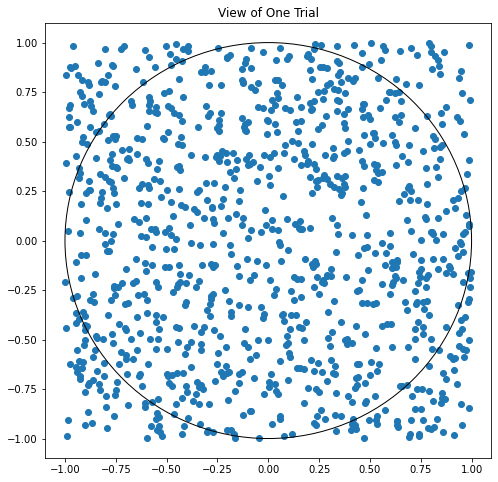

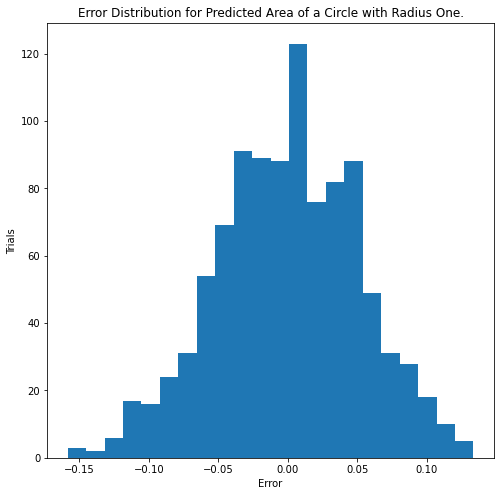

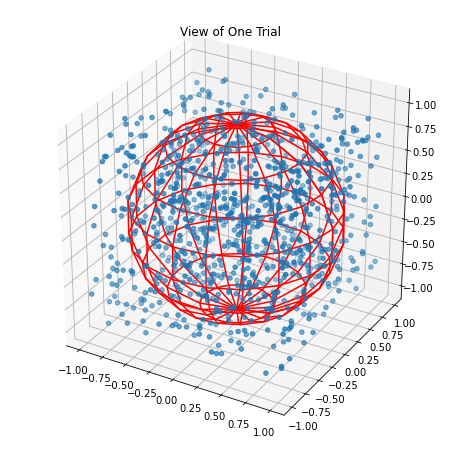

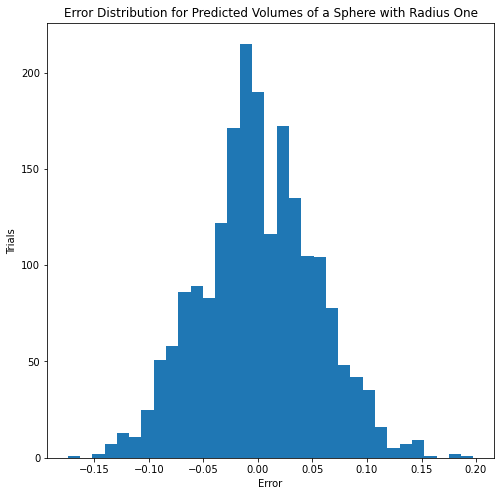

In [26]:
mc_experiment=Monte_Carlo(1000,1000)
mc_experiment.monte_carlo_display()
mc_experiment.three_dim_display()